# Math 753/853 HW2

**Problem 1.** Write a Julia function `bisectsearch` that takes a function $f(x)$ and an interval $a,b$ such that $f(a) f(b) < 0$, returns a root $r$ of $f$ within that interval. Find the root to as many digits accuracy as possible. 

Challenges:
  * Add checks to your `bisectsearch` function that verify that the starting conditions for bisection search are met. The checks should print a helpful error message and exit the function while returning the most reasonable value for the root from available information. 

  * Think carefully about the stopping conditions for bisection search. What kinds of problems are possible for this algorithm when it's implemented in floating-point arthmetic? Add checks to your function that stop iteration and return the most reasonable value for the root. In some cases you might want to print an error or warning message.

  * Add some diagnostic printing to your function that prints out $a,b$, and $f(c)$ at each iteration. Add another argument `diagnostics` to the function that turns the printing on and off. Make `diagnostics` default to `false`.  

  * Write your `bisectsearch` function so that it operates equally well on any floating-point type: Float16, Float32, Float64, or BigFloat.

  * Instead of using `if a; b; end` statements for your checks, use the more Juliaesque `a && b` short-circuit conditional evaluation. Likewise, instead of using `if a; b ; else c ; end` statements, use the `a ? b : c` ternary operator. See the [Julia docs on conditional expressions](http://docs.julialang.org/en/release-0.4/manual/control-flow/#man-conditional-evaluation).


In [1]:
function bisectsearch(f, a, b, diagnostics=false)

    c = float((a+b)/2)
    ftolerance = 10*eps(typeof(c))       # set tolerance = 10 machine eps
    nmax = 1000;                         # some large but finite number
    
    (fa, fb)  = (f(a), f(b))
    
    if fa*fb > zero(c)
        println("bisectsearch(f,a,b) error: a,b do not bracket a zero")
        return c
    end 
    
    n = 0  # counter for iterations
    while abs(b-a) > eps(c) && n < nmax
        
        c = float((a+b)/2)
        fc = f(c)

        # example of compact short-circuit conditional evaluation syntax
        # in place of bulkier if-end 
        diagnostics && println("n == $n,  a,b == $a, $b,  f(c) ==$fc")

        # same as if  abs(fc) < ftolerance; return c; end
        abs(fc) < ftolerance && return c

        # replace either (a, fa) or (b, fb) with (c, fc)
        # using ternary x ? y : z operator to 
        sign(fc) == sign(fa) ? (a,fa) = (c,fc) : (b,fb) = (c,fc)
        
        n += 1 # increment iteration counter
    end
    
    # another short-circuit conditional evaluation
    diagnostics && println("bisectsearch(f,a,b) warning: exiting without convergence")

end

bisectsearch (generic function with 2 methods)

**Problem 2.** Apply the bisection search algorithm to find all real roots of

(a) $3x^3 + x^2 = x + 5$

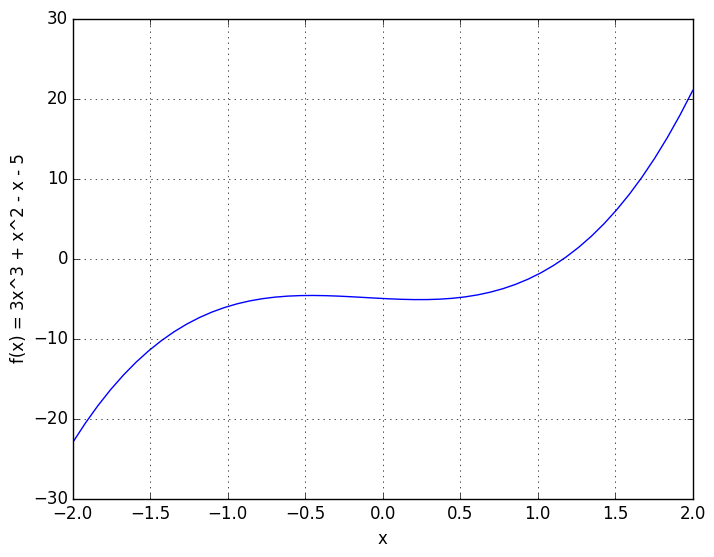

In [2]:
f(x) = 3x.^3 + x.^2 - x - 5
using PyPlot
x = linspace(-2, 2);
plot(x, f(x))
xlabel("x"), ylabel("f(x) = 3x^3 + x^2 - x - 5"); grid("on")

In [3]:
# Looks like it f(x) = 3x^3 + x^2 - x - 5 has a single root near x=1. Bracketed by [a,b] = [0, 2].
r = bisectsearch(f, 0, 2)

1.1697262198537244

In [4]:
# Evaluate f(r), make sure it is very small
f(r)

8.881784197001252e-16

(b) $\cos^2 x + 6 = x$

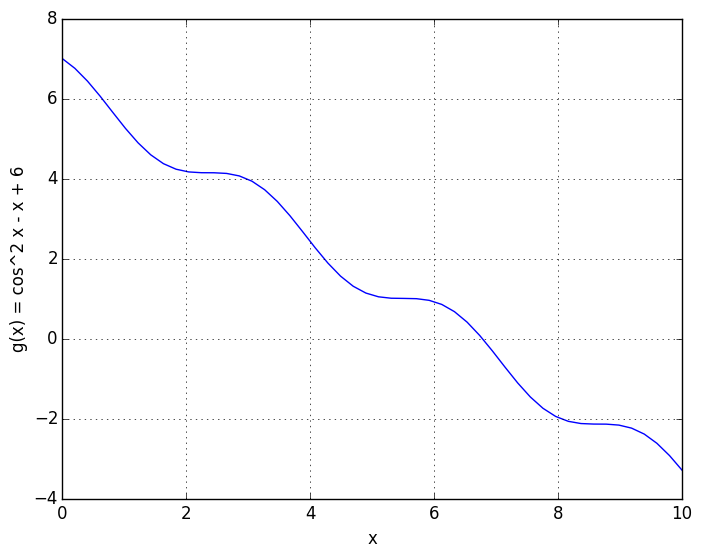

In [5]:
# give this function a different name so we can reuse it in the Newton search problem
g(x) = cos(x).^2 + 6 - x
x = linspace(0, 10);
plot(x, g(x))
xlabel("x"), ylabel("g(x) = cos^2 x - x + 6"); grid("on")

In [6]:
# one root bracketed by [6,8]
r = bisectsearch(g, 6, 8)

6.776092316319502

In [7]:
g(r)

0.0

(c) $\ln x + x^2 = 3$

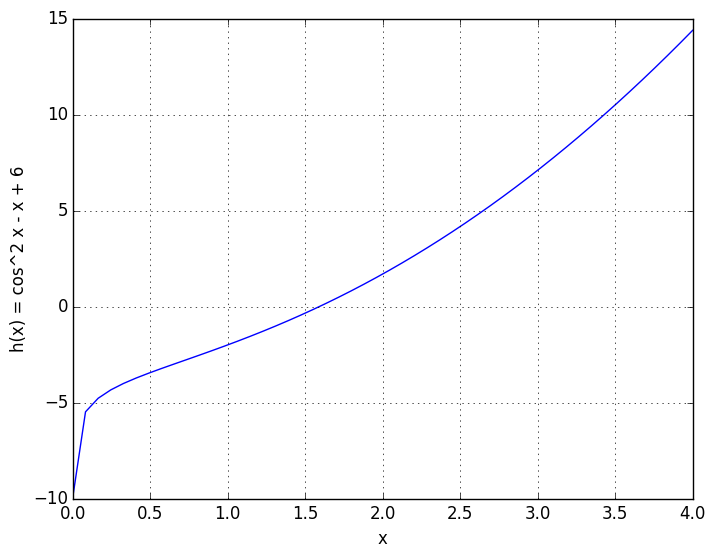

In [8]:
h(x) = log(x) + x.^2 - 3
x = linspace(0.001, 4)
plot(x, h(x))
xlabel("x"), ylabel("h(x) = cos^2 x - x + 6"); grid("on")


In [9]:
r = bisectsearch(h,1,2)

1.5921429370580942

In [10]:
h(r)

8.881784197001252e-16

In [11]:
r = bisectsearch(f,1,2,true)

n == 0,  a,b == 1, 2,  f(c) ==5.875
n == 1,  a,b == 1, 1.5,  f(c) ==1.171875
n == 2,  a,b == 1, 1.25,  f(c) ==-0.587890625
n == 3,  a,b == 1.125, 1.25,  f(c) ==0.246337890625
n == 4,  a,b == 1.125, 1.1875,  f(c) ==-0.181915283203125
n == 5,  a,b == 1.15625, 1.1875,  f(c) ==0.029392242431640625
n == 6,  a,b == 1.15625, 1.171875,  f(c) ==-0.07696199417114258
n == 7,  a,b == 1.1640625, 1.171875,  f(c) ==-0.023960530757904053
n == 8,  a,b == 1.16796875, 1.171875,  f(c) ==0.0026718750596046448
n == 9,  a,b == 1.16796875, 1.169921875,  f(c) ==-0.010655314661562443
n == 10,  a,b == 1.1689453125, 1.169921875,  f(c) ==-0.00399446755181998
n == 11,  a,b == 1.16943359375, 1.169921875,  f(c) ==-0.000661983314785175
n == 12,  a,b == 1.169677734375, 1.169921875,  f(c) ==0.0010047740888694534
n == 13,  a,b == 1.169677734375, 1.1697998046875,  f(c) ==0.0001713524432034319
n == 14,  a,b == 1.169677734375, 1.16973876953125,  f(c) ==-0.000245326171494753
n == 15,  a,b == 1.169708251953125, 1.169738769531

1.1697262198537244

In [12]:
# Let's also test it on 32-bit floats
r = bisectsearch(h,1.0f0, 2.0f0,true)

n == 0,  a,b == 1.0, 2.0,  f(c) ==-0.34453487
n == 1,  a,b == 1.5, 2.0,  f(c) ==0.62211585
n == 2,  a,b == 1.5, 1.75,  f(c) ==0.12613273
n == 3,  a,b == 1.5, 1.625,  f(c) ==-0.112306595
n == 4,  a,b == 1.5625, 1.625,  f(c) ==0.006128788
n == 5,  a,b == 1.5625, 1.59375,  f(c) ==-0.05328417
n == 6,  a,b == 1.578125, 1.59375,  f(c) ==-0.023626566
n == 7,  a,b == 1.5859375, 1.59375,  f(c) ==-0.0087611675
n == 8,  a,b == 1.5898438, 1.59375,  f(c) ==-0.00131917
n == 9,  a,b == 1.5917969, 1.59375,  f(c) ==0.0024039745
n == 10,  a,b == 1.5917969, 1.5927734,  f(c) ==0.00054216385
n == 11,  a,b == 1.5917969, 1.5922852,  f(c) ==-0.00038862228
n == 12,  a,b == 1.592041, 1.5922852,  f(c) ==7.70092f-5
n == 13,  a,b == 1.592041, 1.5921631,  f(c) ==-0.00015592575
n == 14,  a,b == 1.592102, 1.5921631,  f(c) ==-3.9577484f-5
n == 15,  a,b == 1.5921326, 1.5921631,  f(c) ==1.859665f-5
n == 16,  a,b == 1.5921326, 1.5921478,  f(c) ==-1.04904175f-5
n == 17,  a,b == 1.5921402, 1.5921478,  f(c) ==4.053116f-6
n 

1.592143f0

In [13]:
h(r)

4.7683716f-7

**Problem 3.** Write a Julia function `newtonsearch` that take a function $f(x)$ and an initial guess $x_0$, and returns a root $r$ of $f$ using the Newton method. Find the root to as many digits accuracy as possible.

Challenges: 

  * Unlike bisection, which is guaranteed to converge, the Newton method can go haywire. Think of a good way to test if the Newton method is failing, and print an error message and exit in this case. Your function should still return a number of the same floating-point type as $x_0$. In Julia, this is known as  [type stability](http://www.johnmyleswhite.com/notebook/2013/12/06/writing-type-stable-code-in-julia).
  * as in the bisection search, think carefully about the appropriate stopping conditions for the search, given the finite precision of computer arithmetic
  * make sure your code operates equally well on all floating-point types. 
  * add diagnostic printing to your code and turn it on/off with a `diagnostics` argument that defaults to `false`
  * use short-circuit boolean and ternary operators instead of `if-then`, where appropriate, to make your code more compact and readable
 

In [14]:
function newtonsearch(f, x, diagnostics=false)

    x = float(x)
    fx = f(x)
    ftolerance = 10*eps(typeof(float(fx)))
    
    n=0;       # iteration counter
    nmax=100;  # max iterations

    while abs(fx) > ftolerance && n<100;
        
        diagnostics && println("n=$n, x=$x, f(x)=$fx");

        # determine a small dx, relative to x, but larger than eps(x)
        dx = sqrt(eps(x)); 

        # compute Newton step
        fprime = (f(x + dx) - fx)/dx
        x = x - fx/fprime

        # update fx and n
        fx = f(x)
        n = n+1
        
    end
    x
end


newtonsearch (generic function with 2 methods)

**Problem 4.**  Apply the Newton method to find all real roots of

(a) $3x^3 + x^2 = x + 5$

In [15]:
r = newtonsearch(f,1)

1.1697262198537244

In [16]:
f(r)

8.881784197001252e-16

(b) $\cos^2 x + 6 = x$

In [17]:
r = newtonsearch(g,7)

6.776092316319502

In [18]:
g(r)

0.0

(c) $\ln x + x^2 = 3$

In [19]:
p(x) = log(x) + x^2 - 3

p (generic function with 1 method)

In [20]:
# Let's try this one in high precision, using BigFloat
r = newtonsearch(h, BigFloat(1))

1.592142937058093867781640717162575608487041280209297260897580871974043026175967

In [21]:
h(r)

0.000000000000000000000000000000000000000000000000000000000000000000000000000000

In [22]:
# Let's check out the converegence, step-by-step, using the diagnostic print statements
r = newtonsearch(h, 1.0, true)

n=0, x=1.0, f(x)=-2.0
n=1, x=1.6666666633552976, f(x)=0.28860338851905
n=2, x=1.593292920585597, f(x)=0.004385224652566855
n=3, x=1.5921432154543025, f(x)=1.0613494678679558e-6
n=4, x=1.592142937058112, f(x)=6.927791673660977e-14


1.5921429370580937

**Problem 5.** Modify your bisection-search and Newton-method functions so that, along with the root $r$ they return a vector of errors $e_n = | x_n - r|$ for $n=1,2,...$. Then solve $\cos^2 x + 6 = x$ using both bisection and Newton method, and make a plot comparing $e_n$ versus $n$ for the two methods. Put both the bisection errors and the Newton method errors on the same plot. Use blue circles for bisection errors and red squares for Newton method. Make the vertical $e_n$ axis logarithmic.

In [23]:
function bisectsearch(f, a, b, diagnostics=false)

    c = float((a+b)/2)
    ftolerance = 10*eps(typeof(c))       # set tolerance = 10 machine eps
    nmax = 1000;                         # some large but finite number
    
    (fa, fb)  = (f(a), f(b))
    
    if fa*fb > zero(c)
        println("bisectsearch(f,a,b) error: a,b do not bracket a zero")
        return c
    end 
    
    n = 1     # counter for iterations
    err = []  # vector for returning  errors at each stage
    
    while abs(b-a) > eps(c) && n < nmax
        
        c = float((a+b)/2)
        fc = f(c)
        push!(err,c)  # append current value of c to error vector
            
        # example of compact short-circuit conditional evaluation syntax
        # in place of bulkier if-end 
        diagnostics && println("n == $n,  a,b == $a, $b,  f(c) ==$fc")

        # same as if  abs(fc) < ftolerance; break; end
        abs(fc) < ftolerance && break

        # replace either (a, fa) or (b, fb) with (c, fc)
        # using ternary x ? y : z operator to 
        sign(fc) == sign(fa) ? (a,fa) = (c,fc) : (b,fb) = (c,fc)
        
        n += 1 # increment iteration counter
    end
    
    pop!(err)         # take last value of c off the err vector
    err = abs(err-c)  # convert values of c to errors 
    (c,err)           # return c and vector of errors
end

function newtonsearch(f, x, diagnostics=false)

    x = float(x)
    fx = f(x)
    ftolerance = 10*eps(typeof(float(fx)))
    
    n=0        # iteration counter
    nmax=100   # max iterations
    err = []   # vector for string errors, step by step
    
    
    while abs(fx) > ftolerance && n<100;
        
        diagnostics && println("n=$n, x=$x, f(x)=$fx");
        
        # determine a small dx, relative to x, but larger than eps(x)
        dx = sqrt(eps(x)) 

        # compute Newton step
        fprime = (f(x + dx) - fx)/dx
        x = x - fx/fprime

        # update fx, n, and error
        fx = f(x)
        n += 1
        push!(err, x)
        
        
    end
    pop!(err)
    err = abs(err-x)
    (x,err)
end

newtonsearch (generic function with 2 methods)

We have theoretical estimates of the convergence rates of bisection and Newton method. Do your error plots fit this theory, or not? Explain.

In [24]:
(rbisect, errbisect) = bisectsearch(g,6,8)

(6.776092316319502,[0.223908,0.276092,0.0260923,0.0989077,0.0364077,0.00515768,0.0104673,0.00265482,0.00125143,0.000701691  …  8.20677e-13,9.98313e-13,8.88178e-14,3.6593e-13,1.38556e-13,2.4869e-14,3.19744e-14,3.55271e-15,1.06581e-14,3.55271e-15])

In [25]:
(rnewton, errnewton) = newtonsearch(g,7)

(6.776092316319502,[0.00707367,1.47899e-5,6.60254e-11])

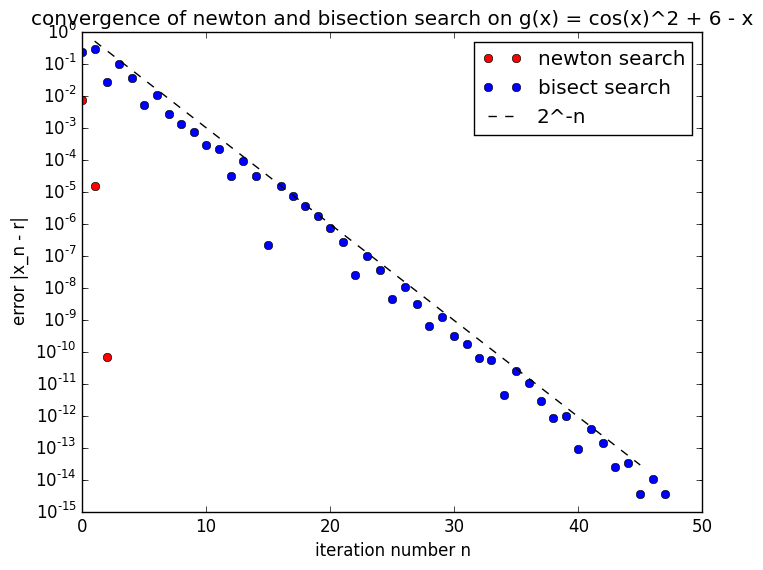

PyObject <matplotlib.text.Text object at 0x7f002b29c290>

In [26]:
semilogy(errnewton, "ro")
semilogy(errbisect, "bo")
n = 1:45
semilogy(n, 0.5.^n, "k--")
xlabel("iteration number n")
ylabel("error |x_n - r|")
legend(("newton search", "bisect search", "2^-n"))
title("convergence of newton and bisection search on g(x) = cos(x)^2 + 6 - x")

We have theoretical estimates of the convergence rates of bisection and Newton method. Do your error plots fit this theory, or not? Explain.

In [37]:
# Yes, the curves fit the estimates for both Newton and bisection. 
# For Newton, the number of digits of precision approximately doubles every iteration: 1e-2, 1e-5, 1e-10
# For bisection, the error scales as 2^-n as expected

## Bonus problems! 

Bonus problems are extra challenges for those who just can't get enough numerical mathematics! 

** Bonus problem 6.** Use your Newton-method function to find the root of $f(x) = x^2$ starting with initial guess $x_0=1$, and plot the error $e_n$ versus $n$ as in problem 5. Does the Newton method converegence toward the true solution at the expected rate? Why or why not? 

In [28]:
p(x) = x^2
(r,err) = newtonsearch(p,1,true)

n=0, x=1.0, f(x)=1.0
n=1, x=0.5000000037252903, f(x)=0.2500000037252903
n=2, x=0.2500000062581443, f(x)=0.06250000312907218
n=3, x=0.12500000512227413, f(x)=0.01562500128056856
n=4, x=0.06250000370480571, f(x)=0.003906250463100728
n=5, x=0.031250002793967696, f(x)=0.0009765626746229888
n=6, x=0.015625002037495263, f(x)=0.00024414068867173114
n=7, x=0.007812501484295326, f(x)=6.103517944211667e-5
n=8, x=0.003906251070165603, f(x)=1.5258797423169917e-5
n=9, x=0.0019531257676135005, f(x)=3.814700264115826e-6
n=10, x=0.0009765630482588385, f(x)=9.536753872245944e-7
n=11, x=0.0004882816406279467, f(x)=2.3841896057431923e-7
n=12, x=0.0002441409026645844, f(x)=5.960478035387808e-8
n=13, x=0.00012207050954768373, f(x)=1.4901209301231144e-8
n=14, x=6.103529593090299e-5, f(x)=3.7253073493729034e-9
n=15, x=3.0517677069824556e-5, f(x)=9.313286137380955e-10
n=16, x=1.525885911446575e-5, f(x)=2.3283278147511453e-10
n=17, x=7.629444109119587e-6, f(x)=5.820841741417958e-11
n=18, x=3.814732344319021e-6

(2.9805427129639175e-8,[0.5,0.25,0.125,0.0625,0.03125,0.015625,0.00781247,0.00390622,0.0019531,0.000976533  …  3.04879e-5,1.52291e-5,7.59964e-6,3.78493e-6,1.87757e-6,9.23886e-7,4.47044e-7,2.08622e-7,8.94101e-8,2.98036e-8])

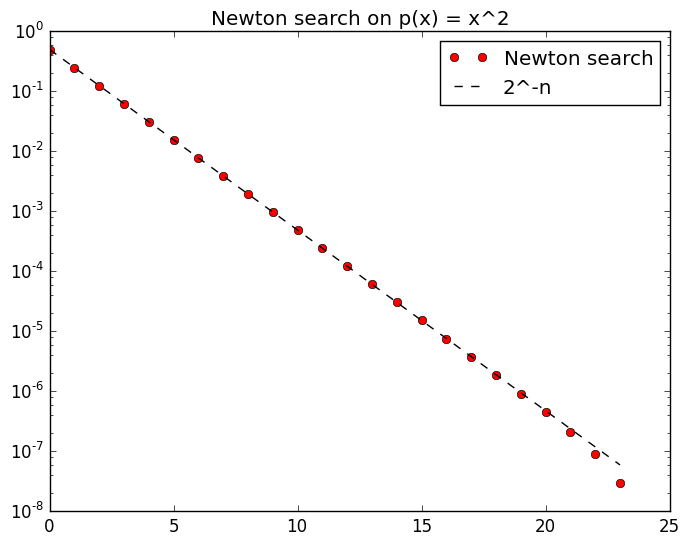

PyObject <matplotlib.text.Text object at 0x7f0028a25290>

In [29]:
semilogy(err, "ro")
semilogy(0.5.^(1:24), "k--")
legend(("Newton search", "2^-n"))
title("Newton search on p(x) = x^2")

In [30]:
# Whoa! Newton search is as slow as bisection on this problem!
# Why? Because the function f(x) = x^2 has slope f'(x) = 2x, 
# At the root x=0, the slope is 0. Our derivation of quadratic convergence
# for Newton search required that f' ≠ 0 at the root! It's not hard to show 
# that for this function, Newton search will converge at 2⁻ⁿ.

** Bonus problem 7.** Consider $f(x) = (1-3/(4x))^{1/3}$. What is the root $r$ of this function? What happens when you apply your Newton-method algorithm to this function with a starting guess $x_0 = 1$? Why?


In [31]:
q(x) = (1-3./(4x)).^(1/3)

q (generic function with 1 method)

In [32]:
# The root of this function is x=3/4. Plug that in and you'll get 0
q(3/4)

0.0

In [33]:
(r,err) = newtonsearch(q,1,true)

n=0, x=1.0, f(x)=0.6299605249474366
n=1, x=-2.824458311678768e-8, f(x)=298.3380890239169
n=2, x=-1.1297469765312255e-7, f(x)=187.94324181737292
n=3, x=-4.5189156567843757e-7, f(x)=118.39747209054788
n=4, x=-1.8075525275749898e-6, f(x)=74.58596752872286
n=5, x=-7.230194075500259e-6, f(x)=46.986363231992925
n=6, x=-2.8920927194752966e-5, f(x)=29.599787912443215
n=7, x=-0.00011568693804692085, f(x)=18.647243434005137
n=8, x=-0.0004628010532776776, f(x)=11.748387894303308
n=9, x=-0.0018520604862263257, f(x)=7.404443258036132
n=10, x=-0.007421961520331783, f(x)=4.673114243384877
n=11, x=-0.029908186282784827, f(x)=2.9654080850859543
n=12, x=-0.12321073943425324, f(x)=1.9208354760517472
n=13, x=-0.5535664972239525, f(x)=1.330417036011958
n=14, x=-3.4400094485942034, f(x)=1.0679521366183735
n=15, x=-61.09470995115644, f(x)=1.0040753760622745
n=16, x=-15174.380360375248, f(x)=1.0000164748658853
n=17, x=-1.0123653524310206e9, f(x)=1.0000000002469465
n=18, x=-Inf, f(x)=1.0


(NaN,[NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN])

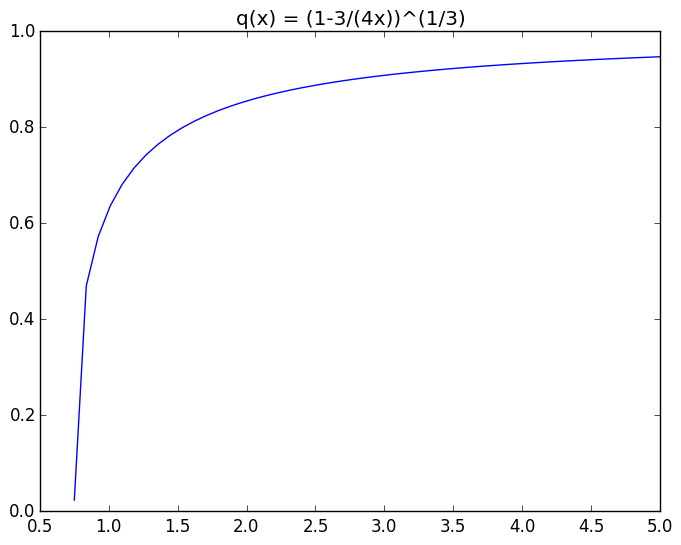

PyObject <matplotlib.text.Text object at 0x7f00288cf450>

In [34]:
# Wow, Newton search goes totally crazy on this function! Why? Let's plot
# 
using PyPlot
x = linspace(0.75001, 5)
plot(x,q(x))
title("q(x) = (1-3/(4x))^(1/3)")

In [35]:
# The problem is the slope of this function is infinite at the root!
# q'(x) = 1/3 (1-3/(4x))^(-2/3) (3/4 x^-2), which blows up as x -> 3/4
# Newton search will never be able to find roots with infinite slope